In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Part A: Data Cleaning & Exploratory Analysis.

1. Import full data set using Pandas:
   * Verify that the shape is: (864863, 74).

In [2]:
df = pd.read_csv('bottle.csv')

/var/folders/4g/7cwxt52n09sb7vzyh6tzj3w00000gn/T/ipykernel_78638/3912374764.py:1: DtypeWarning: Columns (47,73) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('bottle.csv')


In [3]:
df.head()

,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,...,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1,DIC Quality Comment
0,1,1,054.0 056.0,19-4903CR-HY-060-0930-05400560-0000A-3,0,10.50,33.440,NaN,25.649,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,054.0 056.0,19-4903CR-HY-060-0930-05400560-0008A-3,8,10.46,33.440,NaN,25.656,NaN,...,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,3,054.0 056.0,19-4903CR-HY-060-0930-05400560-0010A-7,10,10.46,33.437,NaN,25.654,NaN,...,NaN,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,4,054.0 056.0,19-4903CR-HY-060-0930-05400560-0019A-3,19,10.45,33.420,NaN,25.643,NaN,...,NaN,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,5,054.0 056.0,19-4903CR-HY-060-0930-05400560-0020A-7,20,10.45,33.421,NaN,25.643,NaN,...,NaN,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
print("Original dataset shape:", df.shape)

Original dataset shape: (864863, 74)


2. Limit the dataset to the following columns: [T_degC, Salnty, STheta] and then remove all NaN and NA values (Hint: Pandas has a method for this) .
   * Verify the shape is: (812174, 3).

In [5]:
df_clean = df[['T_degC', 'Salnty', 'STheta']].dropna()

In [6]:
print("Clean dataset shape:", df_clean.shape)

Clean dataset shape: (812174, 3)


3. Build the following plots using matplotlib: 

a) Scatter: Salnty (salinity of water) vs T_degC 

b) Scatter: STheta (density of water) vs T_degC.

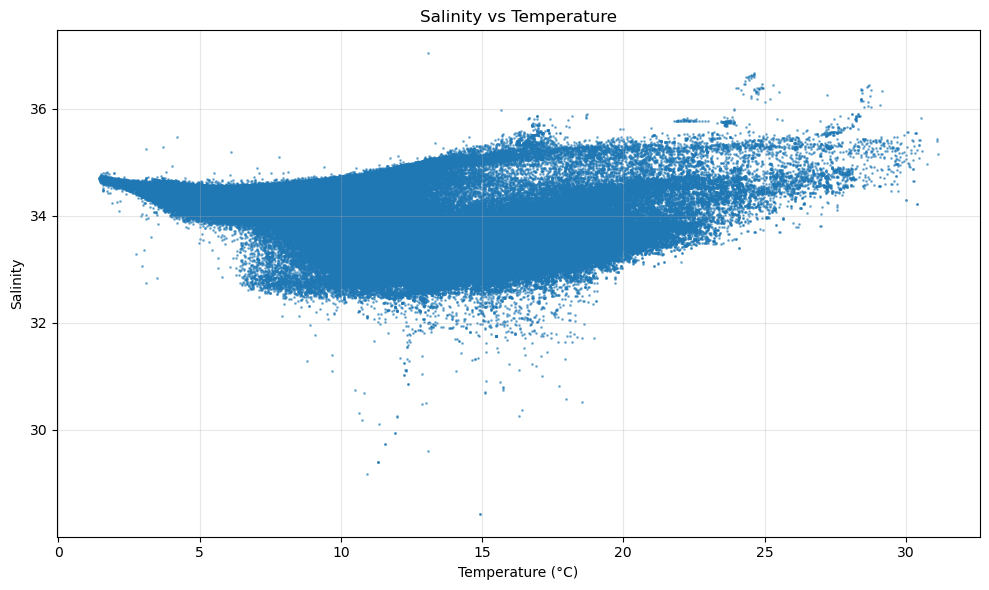

In [7]:
plt.figure(figsize=(10, 6))
plt.scatter(df_clean['T_degC'], df_clean['Salnty'], alpha=0.5, s=1)
plt.title('Salinity vs Temperature')
plt.xlabel('Temperature (°C)')
plt.ylabel('Salinity')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

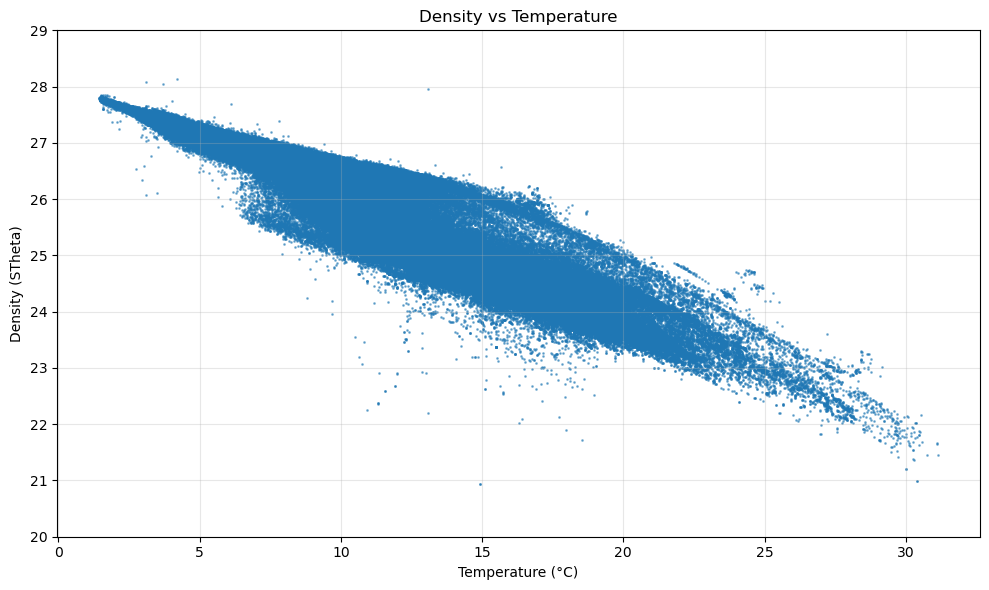

In [8]:
plt.figure(figsize=(10, 6))
plt.scatter(df_clean['T_degC'], df_clean['STheta'], alpha=0.5, s=1)
plt.title('Density vs Temperature')
plt.xlabel('Temperature (°C)')
plt.ylabel('Density (STheta)')
plt.ylim(20, 29)  # Adjust the y-axis limits as needed
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

4. Build the following plot using seaborn: 

a) Distribution of T_degC (hint: distplot will be helpful here).

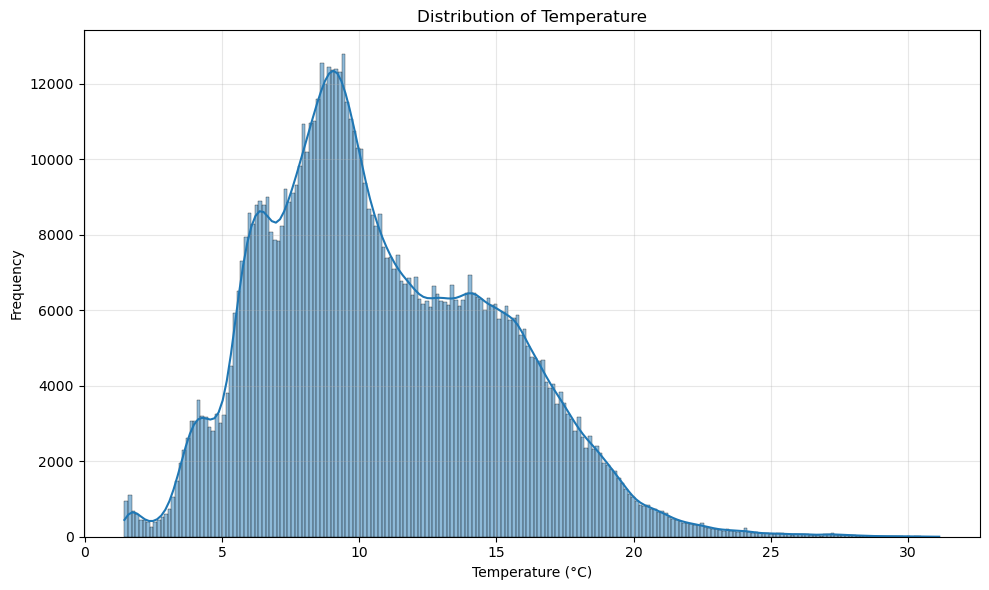

In [9]:
plt.figure(figsize=(10, 6))
sns.histplot(df_clean['T_degC'], kde=True)
plt.title('Distribution of Temperature')
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('temp_distribution.png', dpi=300)
plt.show()

5. Remove obvious outliers from step 3b:
   *  Shape for clean data will be: (812168, 3)
   * Hint: Just looking to remove extreme STheta values - please post on Canvas if struggling with this section.

In [10]:
# IQR for outlier detection
Q1 = df_clean['STheta'].quantile(0.25)
Q3 = df_clean['STheta'].quantile(0.75)
IQR = Q3 - Q1

# Bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Outliers
df_no_outliers = df_clean[(df_clean['STheta'] >= lower_bound) & 
                          (df_clean['STheta'] <= upper_bound)]

print("Dataset shape after outlier removal:", df_no_outliers.shape)

Dataset shape after outlier removal: (811655, 3)


6. Plot 3b again – does it look better? Explain.

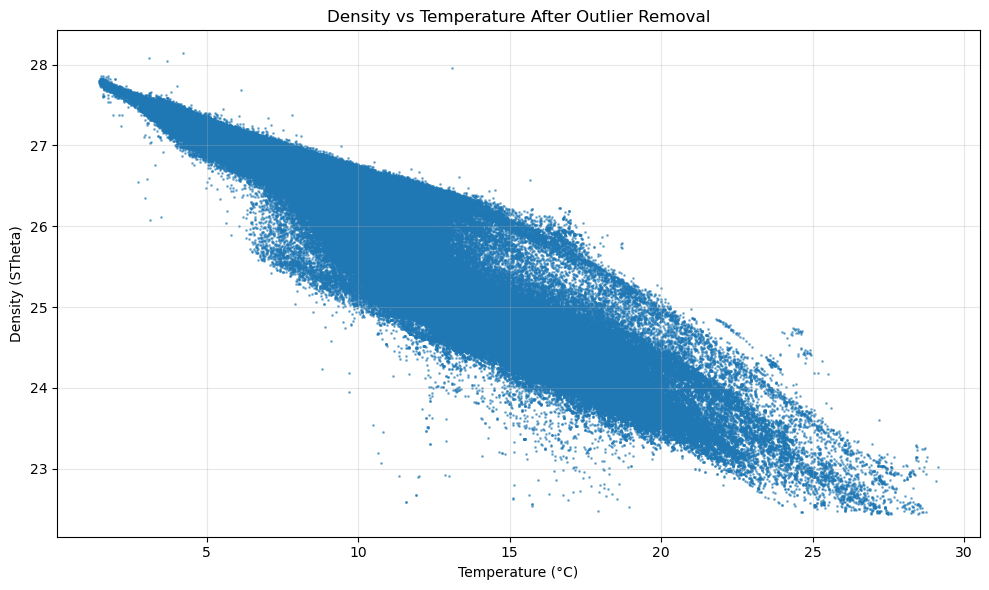

In [11]:
plt.figure(figsize=(10, 6))
plt.scatter(df_no_outliers['T_degC'], df_no_outliers['STheta'], alpha=0.5, s=1)
plt.title('Density vs Temperature After Outlier Removal')
plt.xlabel('Temperature (°C)')
plt.ylabel('Density (STheta)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('density_vs_temp_after.png', dpi=300)
plt.show()

In the plot with outliers the y-axis extends down to 20 kg/m3, where there appears to be some isolated points at the bottom of the plot. 

In the plot after removing outliers the y-axis has a narrower range from 22.5-28 kg/m3 and the main data trend is more clearly visible and the relationship between temperature and density is better visualized.

The plot after removing the outliers looks better for several reasons:

- By removing extreme values, the visualization focuses on the range where most data points sre, allowing patterns to be more visible.

- The inverse relationship between temperature and water density is now more evident, as temperature increases, density decreases in a consistent pattern.

- You can now see what appears to be different water masses or layers in the ocean, shown by the bands of density at different temperature ranges.

The improvement demonstrates why outlier removal is an important step in oceanographic data analysis, as these extreme values can affect the relationships present in the data.

# Part B: Train & Test Split.

As we know, we must generate a training set for model building and a testing set for model validation. Feel free to perform these steps however you want, but please note that sklearn has a `train_test_split` class that is perfect for this type of work.


Our X matrix (features / independent variables) will be: [Salnty, STheta]

Our y matrix (target / dependent variable) will be: T_degC

Build out the following:
- X_train
- X_test
- y_train
- y_test

Make sure to add a seed (called random_state in train_test_split) so your split is reproducible.

In [12]:
# Feature matrix X and target variable
X = df_no_outliers[['Salnty', 'STheta']]  
y = df_no_outliers['T_degC']               

In [13]:
from sklearn.model_selection import train_test_split

# 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [14]:
print("Original dataset shape:", df_no_outliers.shape)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

Original dataset shape: (811655, 3)
X_train shape: (649324, 2)
X_test shape: (162331, 2)
y_train shape: (649324,)
y_test shape: (162331,)


In [15]:
print("\nTraining set statistics:")
print("X_train['Salnty'] mean:", X_train['Salnty'].mean())
print("X_train['STheta'] mean:", X_train['STheta'].mean())
print("y_train mean:", y_train.mean())

print("\nTest set statistics:")
print("X_test['Salnty'] mean:", X_test['Salnty'].mean())
print("X_test['STheta'] mean:", X_test['STheta'].mean())
print("y_test mean:", y_test.mean())


Training set statistics:
X_train['Salnty'] mean: 33.84204449781619
X_train['STheta'] mean: 25.82028574012357
y_train mean: 10.836809147667418

Test set statistics:
X_test['Salnty'] mean: 33.841472472294264
X_test['STheta'] mean: 25.81937618033524
y_test mean: 10.838466417381769


# Part C: Linear Regression Using Normal Equation - Coded In Python.

We will use the closed-form solution called the Normal Equation to solve the following:
1. Build the normal equation using numpy & fit using your training data (X_train & y_train).
   * Note: Make sure to include an intercept value of 1 for every observation in your X_train.

In [16]:
# Adding a column of 1 for the intercept
X_train_b = np.c_[np.ones((X_train.shape[0], 1)), X_train]
X_test_b = np.c_[np.ones((X_test.shape[0], 1)), X_test]

# Normal Equation: (X^T X)^(-1) X^T y
# X^T X
XT_X = X_train_b.T.dot(X_train_b)

# Iinverse of X^T X
XT_X_inv = np.linalg.inv(XT_X)

# X^T y
XT_y = X_train_b.T.dot(y_train)

# Coefficients
theta = XT_X_inv.dot(XT_y)

2. Print out the coefficients - we will need to compare these to the output in Part 4.

In [17]:
print("Linear Regression Coefficients (Normal Equation):")
print(f"Intercept: {theta[0]:.4f}")
print(f"Coefficient for Salinity: {theta[1]:.4f}")
print(f"Coefficient for Density (STheta): {theta[2]:.4f}")

Linear Regression Coefficients (Normal Equation):
Intercept: 34.6519
Coefficient for Salinity: 3.1597
Coefficient for Density (STheta): -5.0636


In [18]:
coef_df = pd.DataFrame({
    'Feature': ['Intercept', 'Salinity', 'Density (STheta)'],
    'Coefficient': theta
})
print("\nCoefficients table:")
print(coef_df)


Coefficients table:
            Feature  Coefficient
0         Intercept    34.651855
1          Salinity     3.159650
2  Density (STheta)    -5.063618


3. Predict T_degC for the test data using the fitted values in b.
   * Make sure to include an intercept value of 1 for every observation in your X_test.
   * Call predictions y_pred.

In [19]:
y_pred = X_test_b.dot(theta)
print("\nPredictions on the test set:")
print(y_pred)


Predictions on the test set:
[9.28332746 7.22180969 9.21590053 ... 9.24221707 4.69036868 8.4989224 ]


4. Calculate the following for the test data:
   * mean squared error
   * r-squared
   *  explained variance
   * Note: https://scikit-learn.org/stable/modules/classes.html#sklearn-metrics-metricsLinks to an external site.

In [20]:
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r_squared = r2_score(y_test, y_pred)
exp_var = explained_variance_score(y_test, y_pred)

print("\nModel Performance Metrics:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (R²): {r_squared:.4f}")
print(f"Explained Variance Score: {exp_var:.4f}")


Model Performance Metrics:
Mean Squared Error (MSE): 0.2230
Root Mean Squared Error (RMSE): 0.4723
R-squared (R²): 0.9874
Explained Variance Score: 0.9874


5. Create a scatterplot that shows actual versus predicted values for the T_degC.

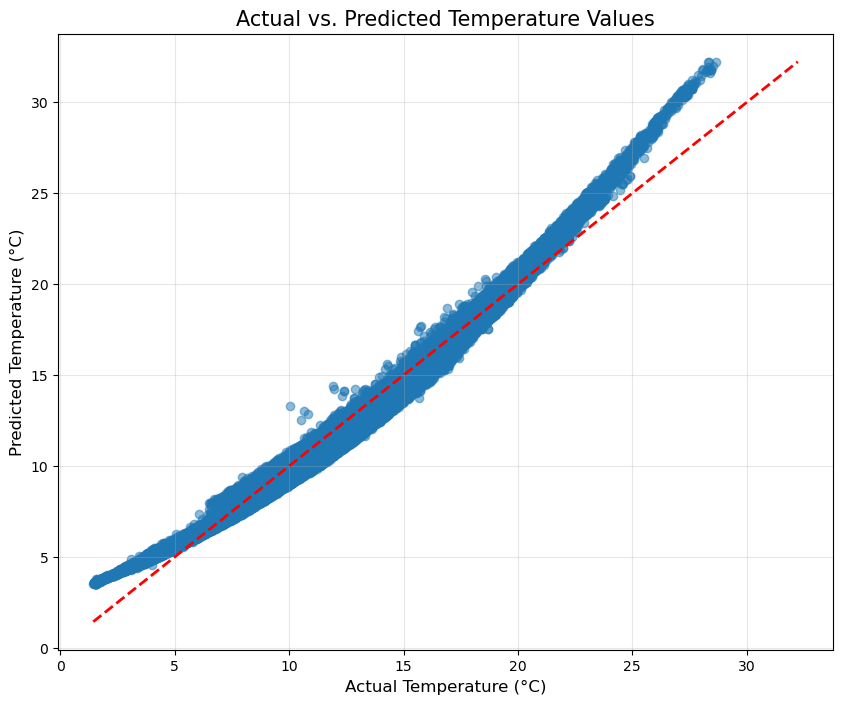

In [21]:
plt.figure(figsize=(10, 8))
plt.scatter(y_test, y_pred, alpha=0.5)

# Add a perfect prediction line
min_val = min(min(y_test), min(y_pred))
max_val = max(max(y_test), max(y_pred))
plt.plot([min_val, max_val], [min_val, max_val], 'r--', lw=2)

plt.title('Actual vs. Predicted Temperature Values', fontsize=15)
plt.xlabel('Actual Temperature (°C)', fontsize=12)
plt.ylabel('Predicted Temperature (°C)', fontsize=12)
plt.grid(True, alpha=0.3)

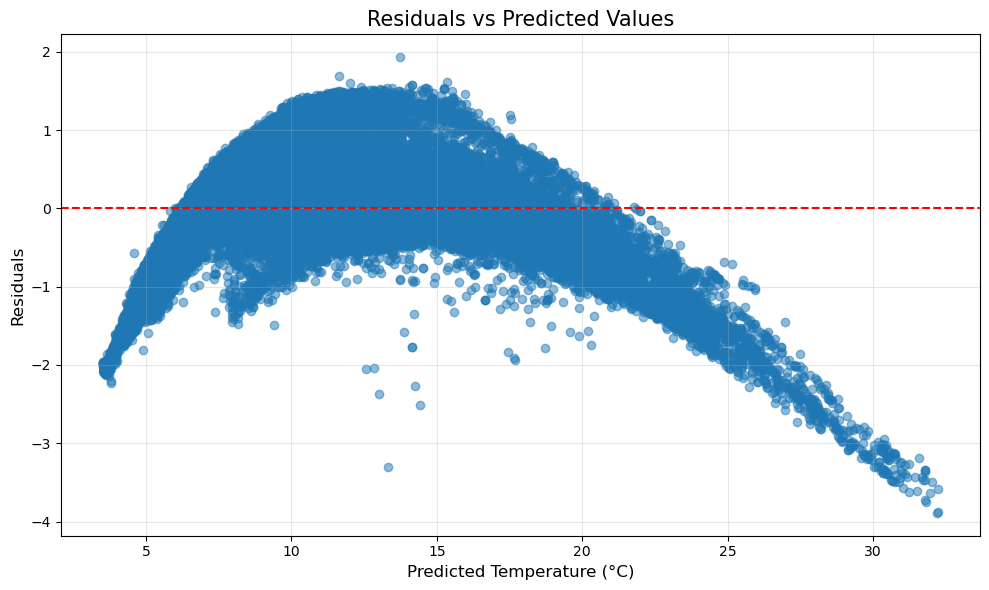

In [22]:
# Residuals Plot
residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals vs Predicted Values', fontsize=15)
plt.xlabel('Predicted Temperature (°C)', fontsize=12)
plt.ylabel('Residuals', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


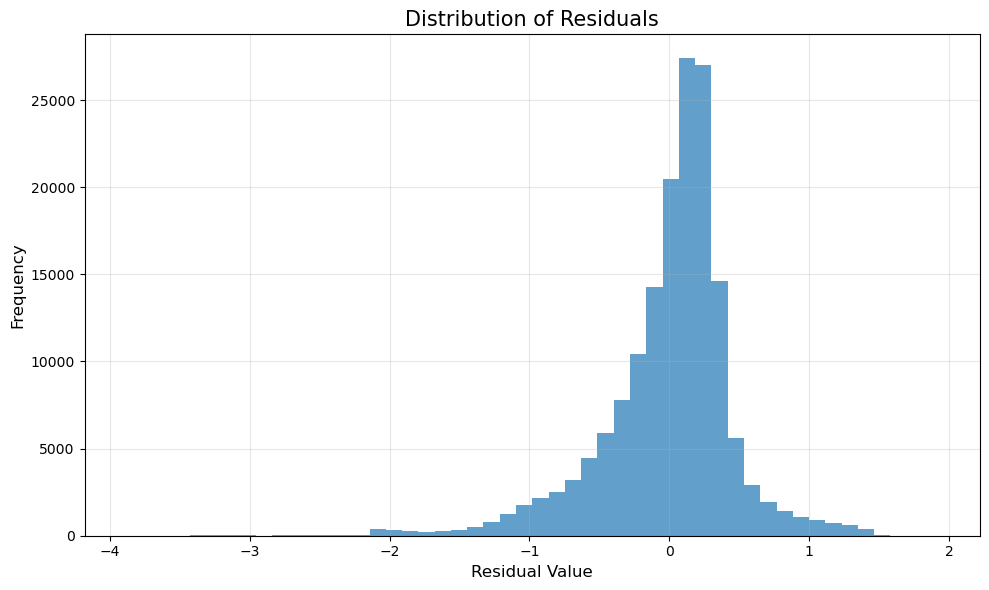

In [23]:
# Checking if residuals are normally distributed
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=50, alpha=0.7)
plt.title('Distribution of Residuals', fontsize=15)
plt.xlabel('Residual Value', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Part D: Using sklearn API.

In [24]:
from sklearn.linear_model import LinearRegression

sklearn is a fantastic tool within python full of various model classes. For this portion of the assignment, use the class LinearRegression to replicate work done in Part C. Specifically, you should create an instance of the following class:

1. Create an instance of the LinearRegression class called "lin_reg". Fit lin_reg using X_train & y_train.
   * Note: sklearn will automatically add the intercept term, so you do not need to do this here. 

In [25]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

2. Print out the coefficients (including the intercept)
   * Note: These should be EXACTLY the same as what you found in Part C step 2.

In [26]:
print("Linear Regression Coefficients (sklearn):")
print(f"Intercept: {lin_reg.intercept_:.4f}")
print(f"Coefficient for Salinity: {lin_reg.coef_[0]:.4f}")
print(f"Coefficient for Density (STheta): {lin_reg.coef_[1]:.4f}")

Linear Regression Coefficients (sklearn):
Intercept: 34.6519
Coefficient for Salinity: 3.1597
Coefficient for Density (STheta): -5.0636


In [27]:
coef_df1 = pd.DataFrame({
    'Feature': ['Intercept', 'Salinity', 'Density (STheta)'],
    'Coefficient': [lin_reg.intercept_, lin_reg.coef_[0], lin_reg.coef_[1]]
})
print("\nCoefficients table:")
print(coef_df1)


Coefficients table:
            Feature  Coefficient
0         Intercept    34.651855
1          Salinity     3.159650
2  Density (STheta)    -5.063618


3. Predict T_degC for the test data using the fitted values in b.
   * Call predictions y_pred_sklearn.

In [29]:
y_pred_sklearn = lin_reg.predict(X_test)
print("\nPredictions on the test set (sklearn):")
print(y_pred_sklearn)


Predictions on the test set (sklearn):
[9.28332746 7.22180969 9.21590053 ... 9.24221707 4.69036868 8.4989224 ]


4. Calculate the following for the test data:
   * mean squared error
   * r-squared
   * explained variance.

In [30]:
mse = mean_squared_error(y_test, y_pred_sklearn)
rmse = np.sqrt(mse)
r_squared = r2_score(y_test, y_pred_sklearn)
exp_var = explained_variance_score(y_test, y_pred_sklearn)

print("\nModel Performance Metrics:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (R²): {r_squared:.4f}")
print(f"Explained Variance Score: {exp_var:.4f}")


Model Performance Metrics:
Mean Squared Error (MSE): 0.2230
Root Mean Squared Error (RMSE): 0.4723
R-squared (R²): 0.9874
Explained Variance Score: 0.9874


5. Create a scatterplot that shows actual versus predicted values for the T_degC.

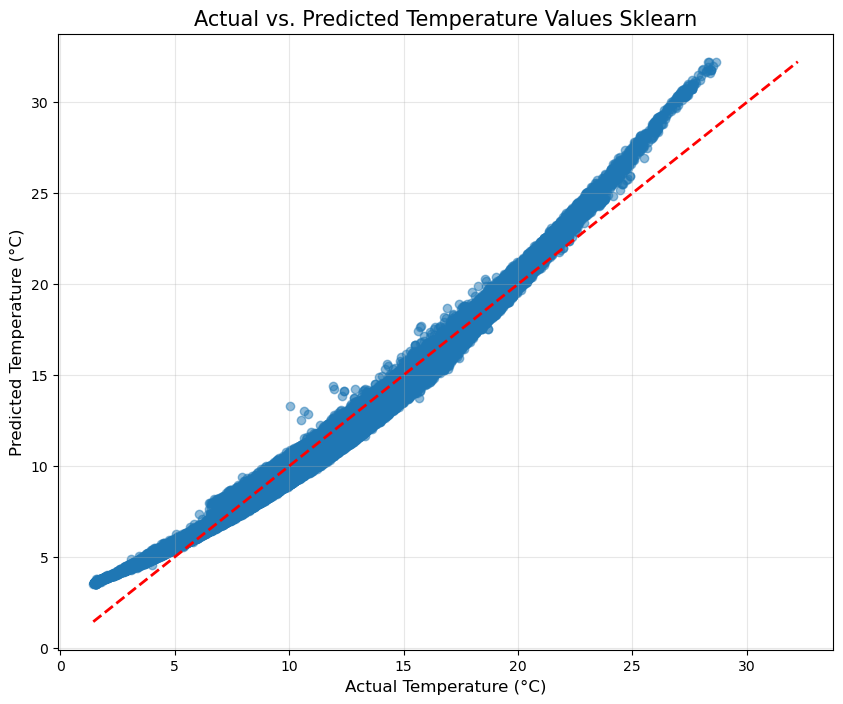

In [32]:
plt.figure(figsize=(10, 8))
plt.scatter(y_test, y_pred_sklearn, alpha=0.5)

min_val = min(min(y_test), min(y_pred_sklearn))
max_val = max(max(y_test), max(y_pred_sklearn))
plt.plot([min_val, max_val], [min_val, max_val], 'r--', lw=2)

plt.title('Actual vs. Predicted Temperature Values Sklearn', fontsize=15)
plt.xlabel('Actual Temperature (°C)', fontsize=12)
plt.ylabel('Predicted Temperature (°C)', fontsize=12)
plt.grid(True, alpha=0.3)

In [33]:
try:
    manual_pred_diff = np.abs(y_pred - y_pred_sklearn).mean()
    print(f"\nAverage difference between manual and sklearn predictions: {manual_pred_diff:.10f}")
    
    print("\nComparison of coefficients:")
    print(f"Manual intercept vs sklearn intercept difference: {abs(theta[0] - lin_reg.intercept_):.10f}")
    print(f"Manual Salinity coef vs sklearn Salinity coef difference: {abs(theta[1] - lin_reg.coef_[0]):.10f}")
    print(f"Manual Density coef vs sklearn Density coef difference: {abs(theta[2] - lin_reg.coef_[1]):.10f}")
except NameError:
    print("\nNote: Cannot compare with manual calculations from Part C as they are not in memory.")
    print("Run Part C and Part D in the same session to see comparison.")



Average difference between manual and sklearn predictions: 0.0000000000

Comparison of coefficients:
Manual intercept vs sklearn intercept difference: 0.0000000034
Manual Salinity coef vs sklearn Salinity coef difference: 0.0000000001
Manual Density coef vs sklearn Density coef difference: 0.0000000001


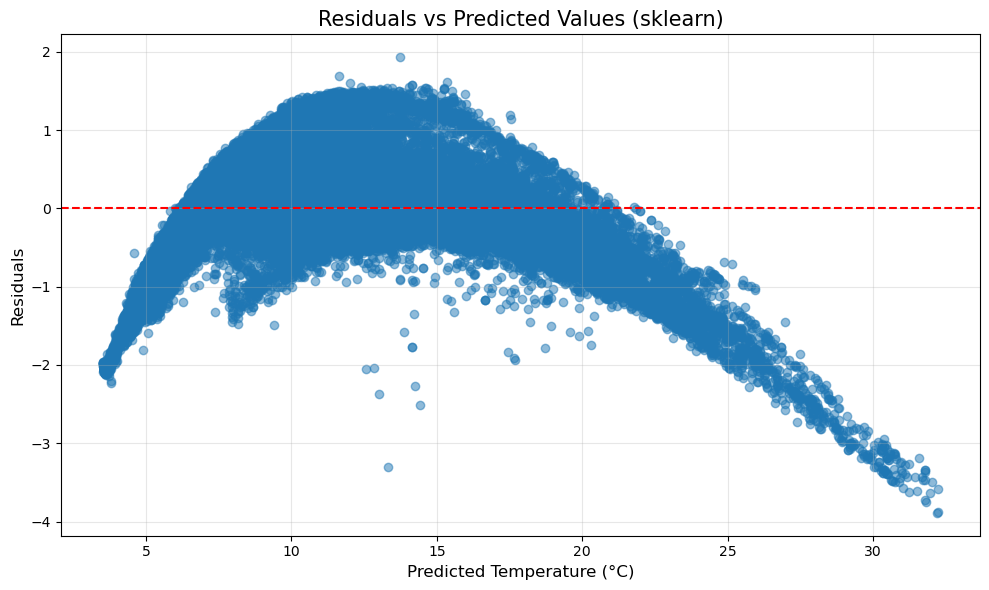

In [34]:
# Residuals Plot
residuals = y_test - y_pred_sklearn

plt.figure(figsize=(10, 6))
plt.scatter(y_pred_sklearn, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals vs Predicted Values (sklearn)', fontsize=15)
plt.xlabel('Predicted Temperature (°C)', fontsize=12)
plt.ylabel('Residuals', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('residuals_plot_sklearn.png', dpi=300)
plt.show()

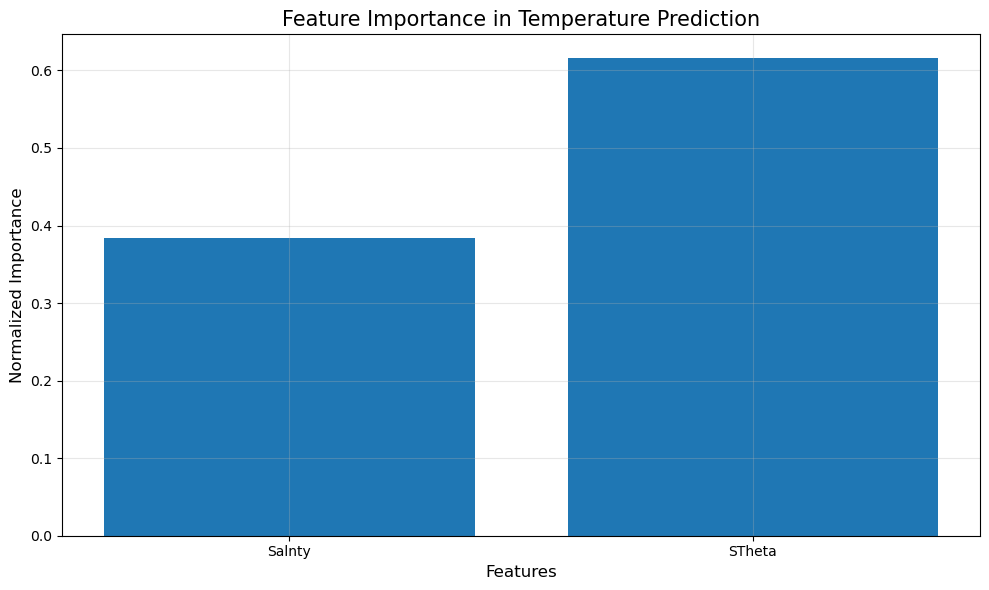

In [35]:
# Feature importance analysis
features = X_train.columns
importance = np.abs(lin_reg.coef_)
importance_normalized = importance / np.sum(importance)

plt.figure(figsize=(10, 6))
plt.bar(features, importance_normalized)
plt.title('Feature Importance in Temperature Prediction', fontsize=15)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Normalized Importance', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('feature_importance.png', dpi=300)
plt.show()

# Part E: Conceptual Questions.

### 1. Why is it important to have a test set?

The test set allows to evaluate the model's performance on data it hasn't seen during training, providing an unbiased assessment of how well it will generalize to new, unseen data. The performance metrics of R2 = 0.9874 and MSE = 0.2230 from the test data give you the confidence about how the model would perform in real-world applications. The test set provides a consistent benchmark for comparing different models.

### 2. If the normal equation always provides a solution, when would we not want to use it?

The normal equation is not recomended when:

- You have large datasets, for the oceanographic data with 812,168 rows, the Normal Equation requires computing (X^T X)^(-1), which has computational complexity and becomes expensive with very large datasets.

- The normal equation requires holding the entire dataset in memory, which may not be feasible for extremely large datasets.

- When features are highly correlated like with salinity and water density, the matrix X^T X can be close to singular, making the inverse numerically unstable.

- The normal equation isn't suitable for scenarios where data arrives sequentially and the model needs continous updates.

### 3. How might we improve the fit of our models from Part C & D?

Note: There are lots of possible answers to this section - just describe one in detail.

Looking at the residual plots, there's a clear pattern showing non-linear relationships between the predicted values and the residuals. To improve model fit of the curved pattern in the residuals, I could add polynomial features like squared or cubed terms of Salinity and STheta to capture the non-linear relationships. This would allow your linear model to fit non-linear relationships, potentially reducing both the MSE and the residuals.

### 4. As we move further into Machine Learning, we will need to continually consider the bias-variance tradeoff. Explain what bias is and what variance is in regards to the bias-variance tradeoff.

Bias refers to the error introduced by approximating a real-world problem with a simplified model. High bias means the model makes strong assumptions about the data and can't capture the true relationship, leading to underfitting.
Variance refers to the model's sensitivity to small fluctuations in the training data. High variance means the model is too complex and captures noise in the training data rather than the underlying pattern, leading to overfitting.
The bias-variance tradeoff acknowledges that as you decrease bias (by using more complex models), you typically increase variance, and vice versa. The goal is to find the sweet spot where the total error (bias² + variance + irreducible error) is minimized.

### 5. In a linear regression model, how might we reduce bias?

### 6. In a linear regression model, how might we reduce variance? 